In [1]:
!pip install gymnasium numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.6 MB/s eta 0:00:00


In [8]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
class UAVClusterEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, n_users=100, area_size=100, n_uavs=5):
        super(UAVClusterEnv, self).__init__()

        self.n_users = n_users
        self.area_size = area_size
        self.n_uavs = n_uavs

        # Define action and observation space
        self.action_space = spaces.Discrete(4)  # Actions: 0: Up, 1: Down, 2: Left, 3: Right
        self.observation_space = spaces.Box(
            low=0, high=area_size, shape=(n_users + n_uavs, 2), dtype=np.float32)

        # Initialize the state
        self.user_state = None
        self.uav_state = None
        self.reset()

    def reset(self):
        # Randomly distribute users in the 2D area
        self.user_state = np.random.uniform(0, self.area_size, (self.n_users, 2))

        # Use K-means clustering to find centroids
        kmeans = KMeans(n_clusters=self.n_uavs)
        kmeans.fit(self.user_state)
        self.uav_state = kmeans.cluster_centers_

        return np.vstack((self.user_state, self.uav_state))

    def step(self, action):
        # Apply action to all users
        if action == 0:  # Up
            self.user_state[:, 1] += 1
        elif action == 1:  # Down
            self.user_state[:, 1] -= 1
        elif action == 2:  # Left
            self.user_state[:, 0] -= 1
        elif action == 3:  # Right
            self.user_state[:, 0] += 1

        # Clip the positions to stay within the area
        self.user_state = np.clip(self.user_state, 0, self.area_size)
        self.uav_state = np.clip(self.uav_state, 0, self.area_size)

        # Update UAV positions based on new user positions (simple static re-clustering for demonstration)
        kmeans = KMeans(n_clusters=self.n_uavs)
        kmeans.fit(self.user_state)
        self.uav_state = kmeans.cluster_centers_

        # Define a dummy reward
        reward = -np.mean(self.user_state)  # Just an example, can be modified

        # Dummy done condition
        done = False

        info = {}

        return np.vstack((self.user_state, self.uav_state)), reward, done, info

    def render(self, mode='human', close=False):
        if mode == 'human':
            plt.figure(figsize=(8, 8))
            plt.scatter(self.user_state[:, 0], self.user_state[:, 1], c='blue', label='Users')
            plt.scatter(self.uav_state[:, 0], self.uav_state[:, 1], c='red', marker='x', label='UAVs')
            plt.xlim(0, self.area_size)
            plt.ylim(0, self.area_size)
            plt.legend()
            plt.title("UAV and User Distribution")
            plt.show()
        else:
            super(UAVClusterEnv, self).render(mode=mode)

    def close(self):
        pass

In [10]:
# Simple policy for testing and visualization
def simple_policy(env, steps=10):
    state = env.reset()
    env.render()

    for _ in range(steps):
        action = env.action_space.sample()  # Random action
        state, reward, done, info = env.step(action)
        env.render()
        print("Reward:", reward)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


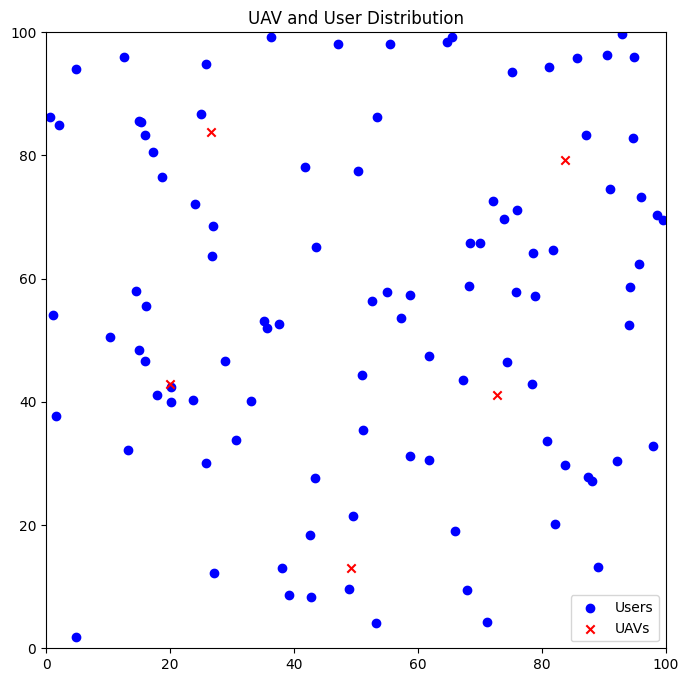

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


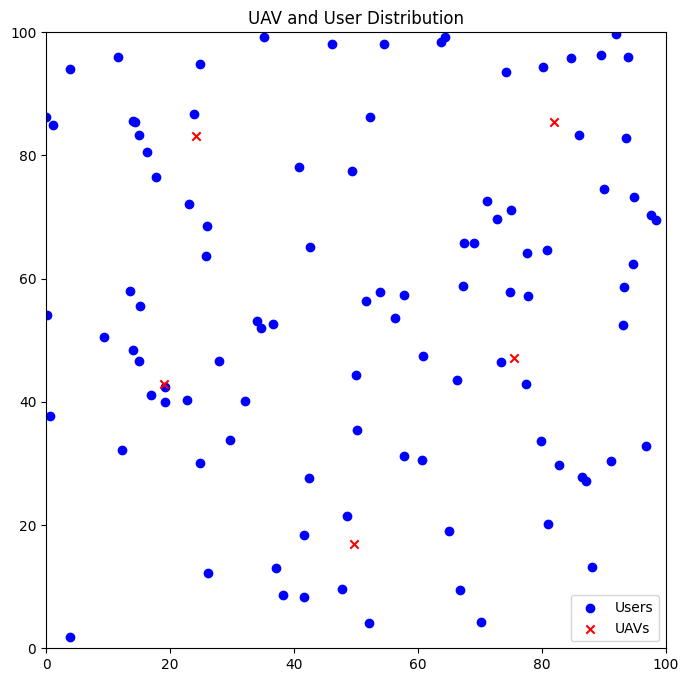

Reward: -53.53699854303377


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


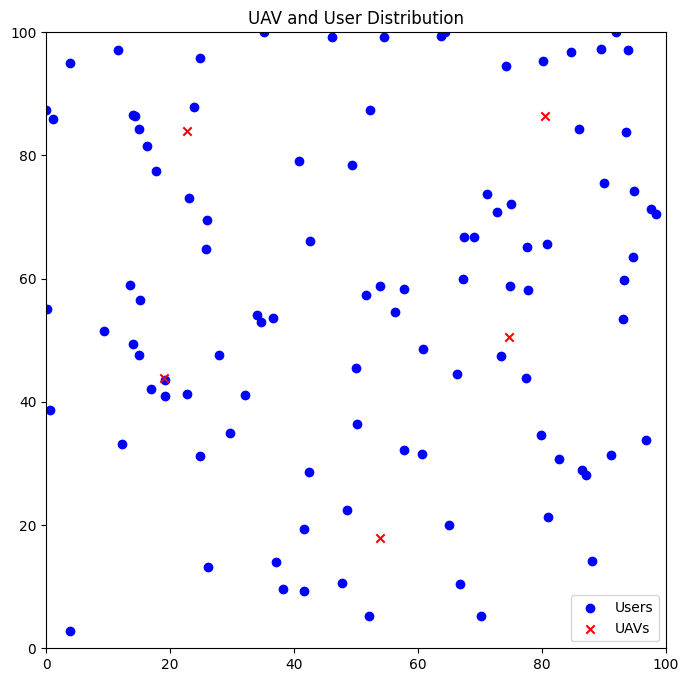

Reward: -54.031007593670275


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


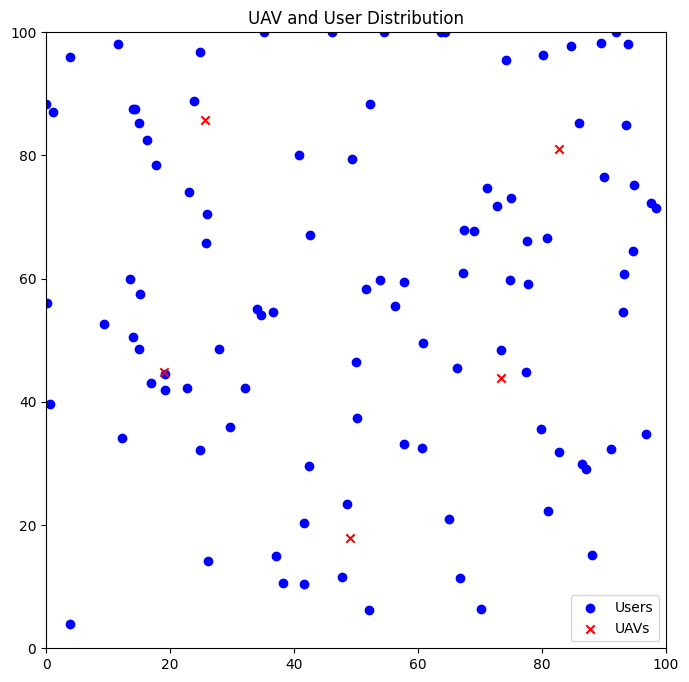

Reward: -54.512510081834414


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


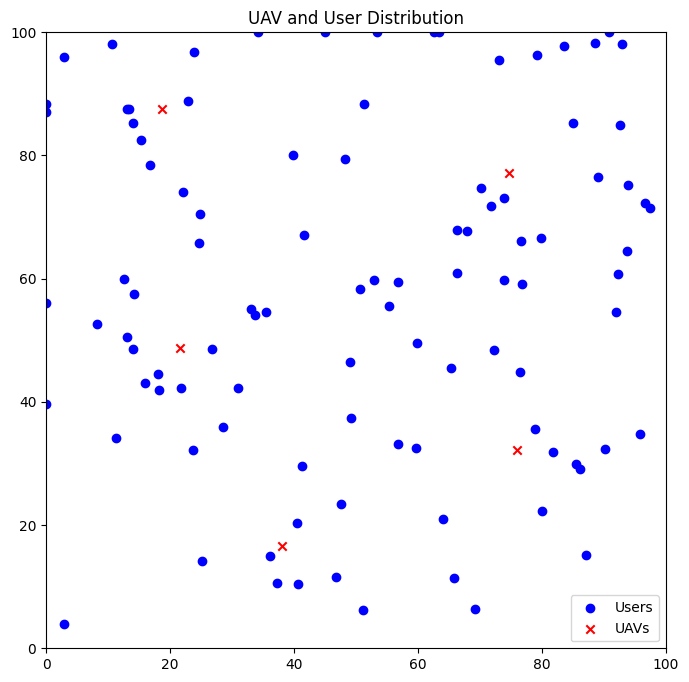

Reward: -54.023626940251624


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


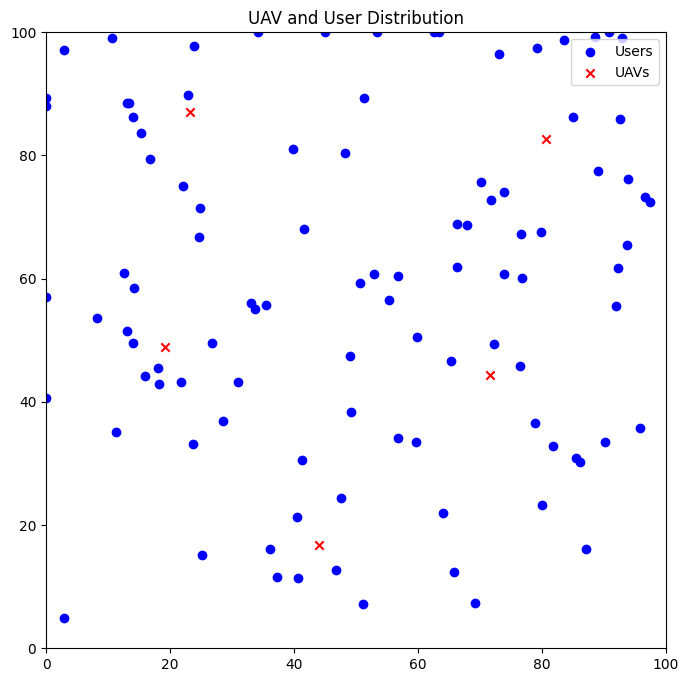

Reward: -54.49362694025162


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


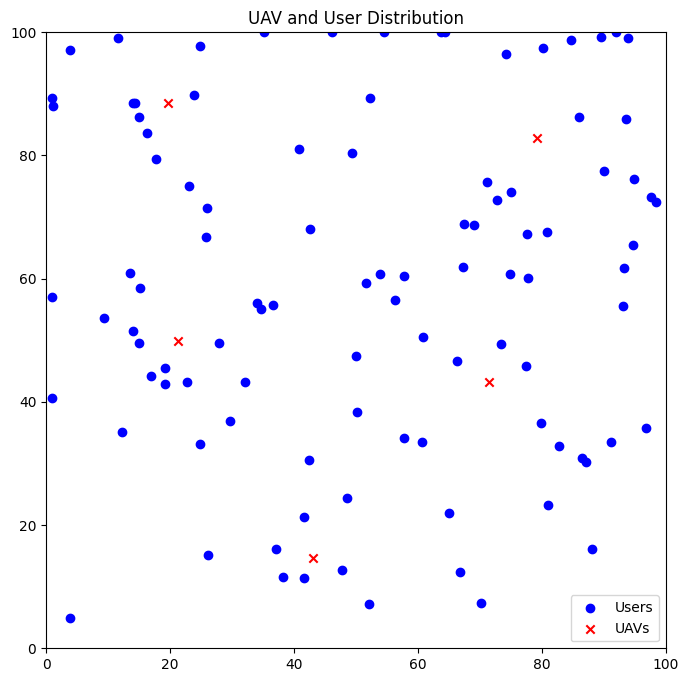

Reward: -54.99362694025162


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


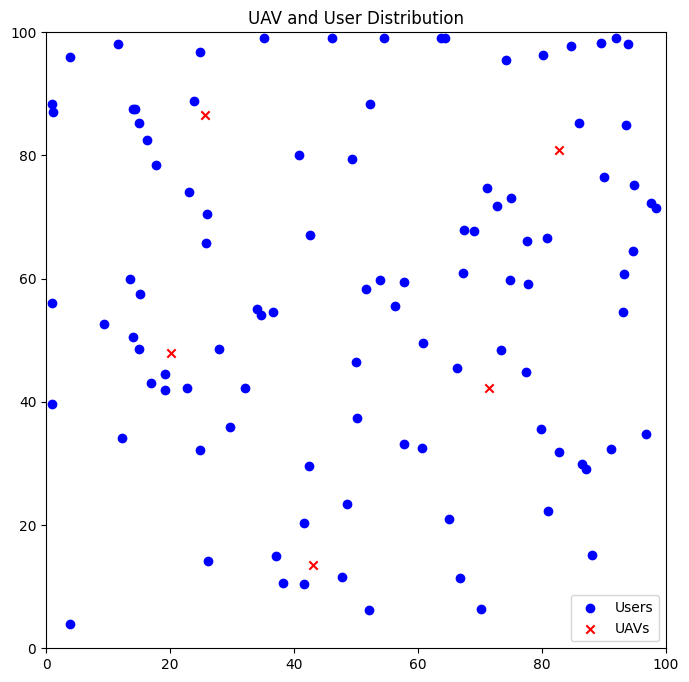

Reward: -54.49362694025162


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


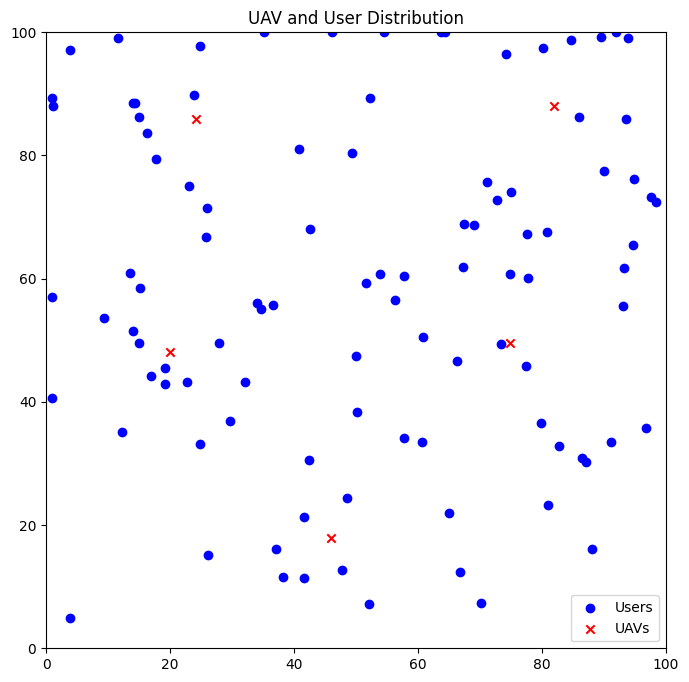

Reward: -54.99362694025162


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


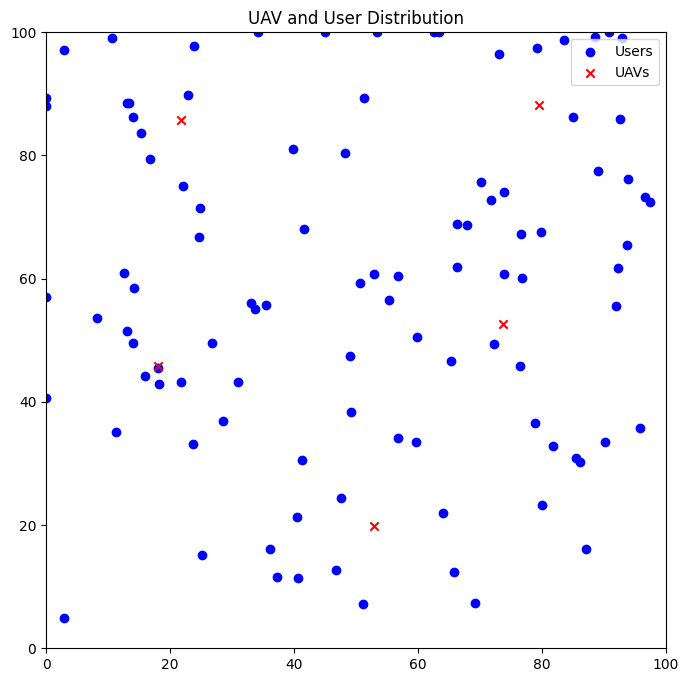

Reward: -54.49362694025162


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


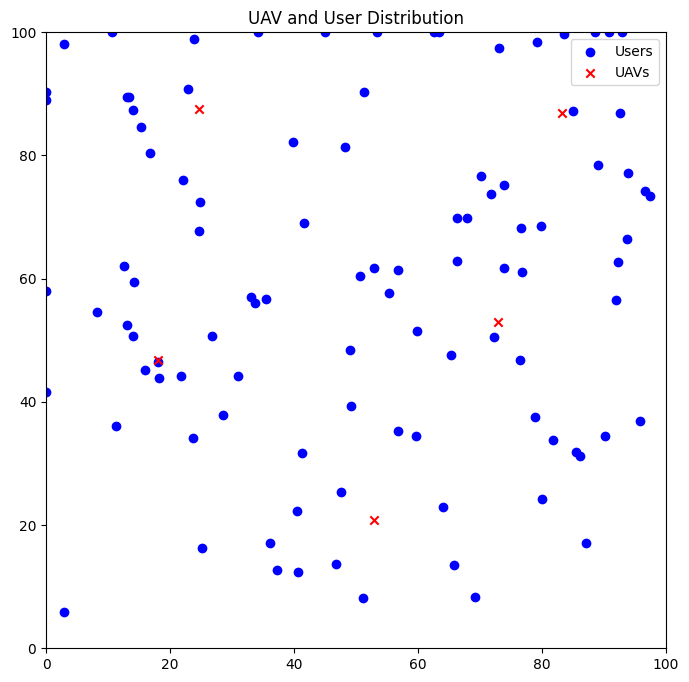

Reward: -54.96171187088317


In [11]:
# Create the environment and run the simple policy
env = UAVClusterEnv()
simple_policy(env)